Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import sys
import sklearn
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset:

In [2]:
data = pd.read_csv('C:/Users/Geekquad/BostonHousing.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
prices = data['medv']
features = data.drop('medv', axis=1)
print("Boston housing dataset has {} data points with {} variables each" .format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each


## Data Exploration:

The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

In [5]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Stats for the boston housing data:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price: ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Stats for the boston housing data:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price: $21.2
Standard deviation of prices: $9.188011545278206


### Question 1 - Feature Observation

We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**High values of 'RM' and lower values of 'LSTAT' and 'PTRATIO' indicates high price of houses in that neighborhood. Lower values of 'RM' and high values of 'LSTAT' and 'PTRATIO' indicates lower prices of houses in the region.**

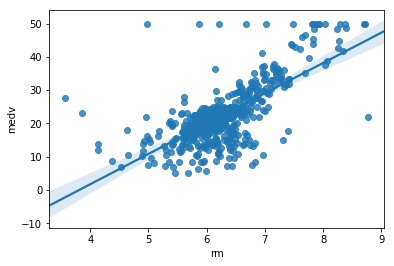

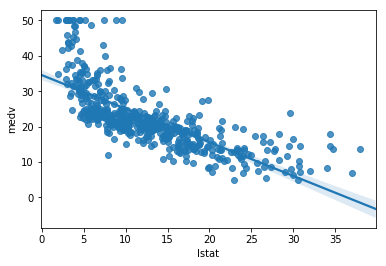

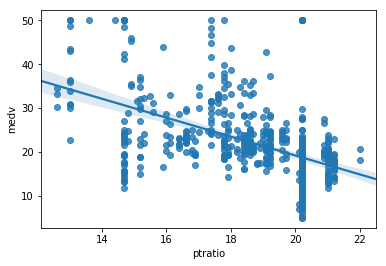

In [6]:
for var in ['rm', 'lstat', 'ptratio']:
    sns.regplot(data[var], prices)
    plt.show()

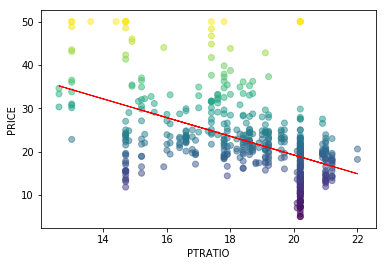

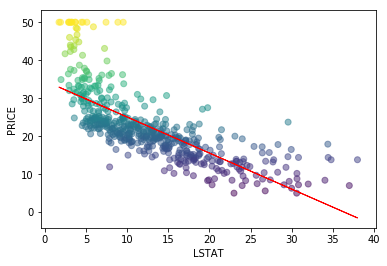

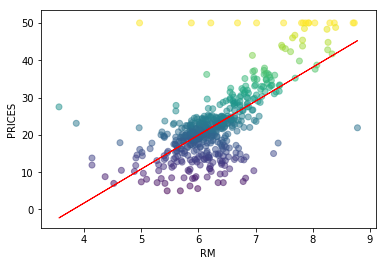

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

"""PTRATIO"""
pt_ratio = data['ptratio'].values.reshape(-1,1)
reg.fit(pt_ratio, prices)
plt.plot(pt_ratio, reg.predict(pt_ratio), color="red", linewidth=1)
plt.scatter(pt_ratio, prices, alpha=0.5, c=prices)
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.show()

"""LSTAT"""
lstat = data['lstat'].values.reshape(-1,1)
reg.fit(lstat, prices)
plt.plot(lstat, reg.predict(lstat), color='red', linewidth=1)
plt.scatter(lstat, prices, alpha=0.5, c=prices)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

"""RM"""
rm = data['rm'].values.reshape(-1, 1)
reg.fit(rm, prices)
plt.plot(rm, reg.predict(rm), color='red', linewidth=1)
plt.scatter(rm, prices, alpha=0.5, c=prices)
plt.xlabel('RM')
plt.ylabel('PRICES')
plt.show()

## Developing a Model:

### Implementation: Define a Performance Metric

In [8]:
from sklearn.metrics import r2_score

In [9]:
def performance_metric(y_true, y_predict):    
    score = r2_score(y_true, y_predict)
    return score

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

## Analyzing Model Performances:

### Learning Curves:

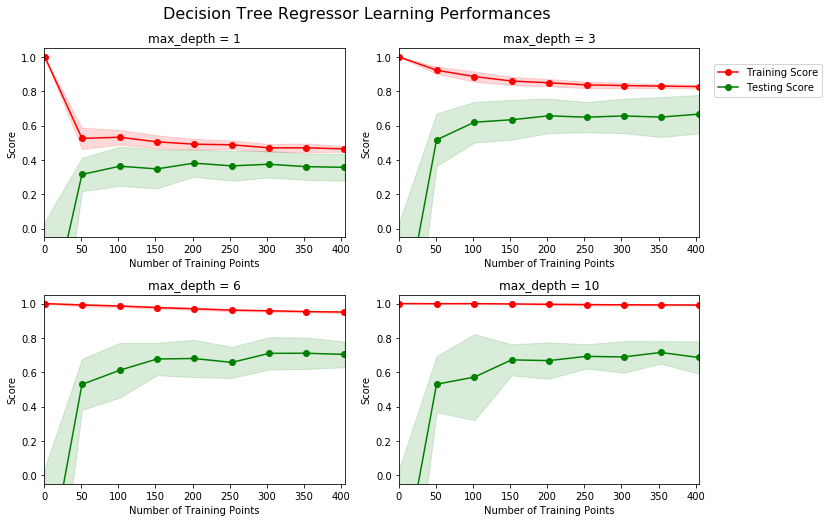

In [13]:
vs.ModelLearning(features, prices)